# Warehouse data prediction to optimize Inventory using Dimensionality Reduction Algortihm :

In [16]:
#Import library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# Load data from CSV
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data[['Feature', 'Target']].values  # Adjust column names as necessary


In [19]:
# Standardize the dataset
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    standardized_data = (data - mean) / std_dev
    return standardized_data


In [20]:
# Calculate covariance matrix
def calculate_covariance_matrix(data):
    return np.cov(data, rowvar=False)



In [21]:
# Perform eigen decomposition
def eigen_decomposition(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    return eigenvalues, eigenvectors



In [22]:
# Project data onto principal components
def project_data(data, eigenvectors, num_components):
    return np.dot(data, eigenvectors[:, -num_components:])  # Select last 'num_components' eigenvectors



In [23]:
# Main function to run PCA and visualize results
if __name__ == "__main__":
    file_path = 'warehouse_demand_data.csv'  
    data = load_data(file_path)

    standardized_data = standardize_data(data)
    covariance_matrix = calculate_covariance_matrix(standardized_data)
    eigenvalues, eigenvectors = eigen_decomposition(covariance_matrix)
    num_components = 1 

    projected_data = project_data(standardized_data, eigenvectors, num_components   )
    print("Projected Data:")
    print(projected_data)



Projected Data:
[[ 0.44503061]
 [-2.25929449]
 [-1.27198879]
 [-0.29737813]
 [ 1.5435588 ]
 [ 1.45090989]
 [ 1.74075831]
 [-1.81813287]
 [-0.49880444]
 [-1.06167796]
 [ 2.01127079]
 [-2.45242195]
 [-1.65431852]
 [ 1.15526521]
 [ 1.36871049]
 [ 1.22095164]
 [ 0.90946702]
 [-0.20951262]
 [ 0.24647246]
 [ 1.09441404]
 [-0.72801676]
 [ 1.54558432]
 [ 0.85381764]
 [ 0.53602607]
 [ 0.29521221]
 [-1.44492364]
 [ 1.35374419]
 [-0.08266009]
 [-0.56112155]
 [ 1.96932048]
 [-0.96306391]
 [ 1.41050538]
 [ 1.90357148]
 [-2.28663032]
 [-2.07041176]
 [-1.61980616]
 [ 0.78508454]
 [ 1.39220567]
 [-0.99697634]
 [ 0.0955043 ]
 [ 1.67696337]
 [ 0.06777033]
 [ 1.90841655]
 [-2.22957144]
 [ 0.88761319]
 [-0.77741548]
 [ 0.53508217]
 [-0.01423922]
 [-0.46200364]
 [ 1.01748512]
 [-2.23867834]
 [-1.37327761]
 [-2.26956219]
 [-1.95807678]
 [-0.36400415]
 [-2.17993982]
 [ 2.00329668]
 [ 1.24017827]
 [ 2.18804873]
 [ 0.44602669]
 [ 0.51712422]
 [ 1.00628452]
 [-1.85256931]
 [ 0.74239202]
 [ 0.87188128]
 [-0.5585

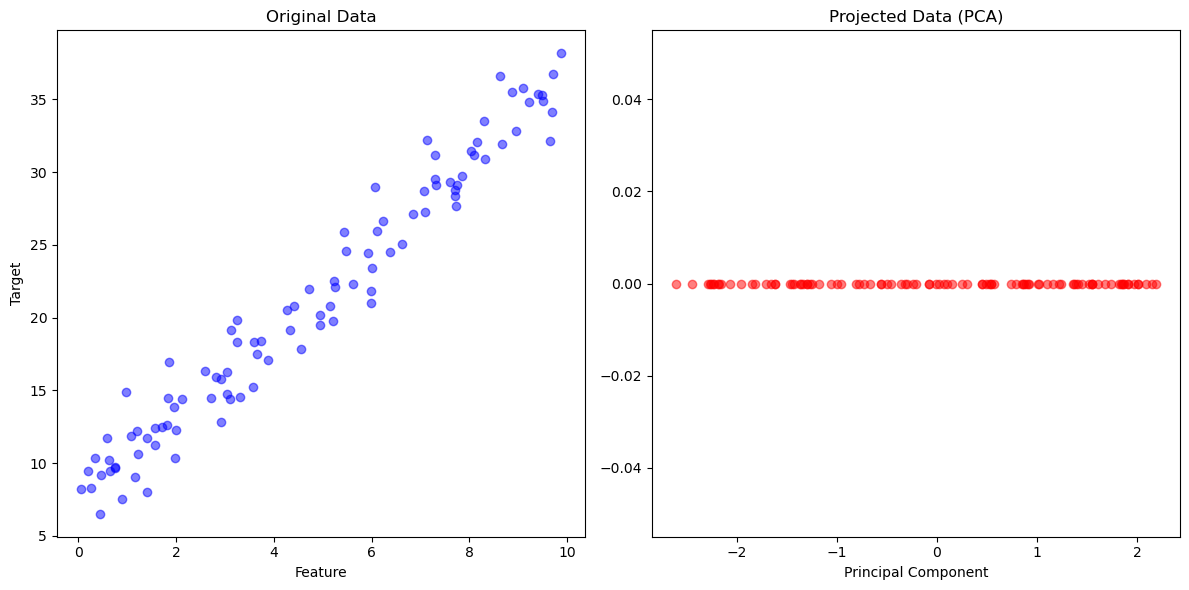

In [24]:
# Visualization of the original data vs projected data
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5)
plt.title('Original Data')
plt.xlabel('Feature')
plt.ylabel('Target')

# Plot projected data
plt.subplot(1, 2, 2)
plt.scatter(projected_data, np.zeros_like(projected_data), color='red', alpha=0.5)
plt.title('Projected Data (PCA)')
plt.xlabel('Principal Component')

plt.tight_layout()
plt.show()
    